In [1]:
# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import graphviz

from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_curve, auc

matplotlib.rc("font", family="Malgun Gothic")

# KNN_분류

유방암 데이터를 이용하여 k(이웃 수)가 3~30까지 변화할 때까지   
정확도(accuracy)의 변화를 그림으로 나타내고   
predict method를 이용하여 예측값을 구해라.  
그리고 실제값과의 정확도와 confusion matrix를 구하라.
- 데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)
- 목표변수(diagnosis : 양성(108개), 음성(benign, 212개)

|변수|변수 설명|변수 역할|변수 형태|
|---|---|---|---|
|diagnosis|진단결과(음성, 양성)|목표변수|이산형|
|mean radius|(세포)평균 반경|설명변수|연속형|
|mean texture|(세포)평균 질감|설명변수|연속형|
|mean perimeter|(세포)평균 둘레|설명변수|연속형|
|mean area|(세포)평균 면적|설명변수|연속형|
|mean smoothness|(세포)평균 매끄러움|설명변수|연속형|
|mean compactness|(세포)평균 조그만 정도|설명변수|연속형|
|mean concavity|(세포)평균 오목함|설명변수|연속형|
|mean concave points|(세포)평균 오목한 점의 수|설명변수|연속형|
|mean symmetry|(세포)평균 대칭|설명변수|연속형|
|mean fractal dimension|(세포)평균 프랙탈 차원|설명변수|연속형|
|radius error|(세포)반경의 표준오차|설명변수|연속형|
|texture error|(세포)질감의 표준오차|설명변수|연속형|
|perimeter error|(세포)둘레의 표준오차|설명변수|연속형|
|area error|(세포)면적의 표준오차|설명변수|연속형|
|smoothness error|(세포)매끄러움의 표준오차|설명변수|연속형|
|compactness error|(세포)조그만 정도의 표준오차|설명변수|연속형|
|concavity error|(세포)오목함의 표준오차|설명변수|연속형|
|concave points error|(세포)오목한 점의 수의 표준오차|설명변수|연속형|
|symmetry error|(세포)대칭의 표준오차|설명변수|연속형|
|fractal dimension error|(세포)프랙탈 차원의 표준오차|설명변수|연속형|
|worst radius|(세포)최대 반경|설명변수|연속형|
|worst texture|(세포)최대 질감|설명변수|연속형|
|worst perimeter|(세포)최대 둘레|설명변수|연속형|
|worst area|(세포)최대 면적|설명변수|연속형|
|worst smoothness|(세포)최대 매끄러움|설명변수|연속형|
|worst compactness|(세포)최대 조그만 정도|설명변수|연속형|
|worst concavity|(세포)최대 오목함|설명변수|연속형|
|worst concave points|(세포)최대 오목한 점의 수|설명변수|연속형|
|worst symmetry|(세포)최대 대칭|설명변수|연속형|
|worst fractal dimension|(세포)최대 프랙탈 차원|설명변수|연속형|


## 1. 데이터 구성하기

In [2]:
df_raw=pd.read_csv("../data/유방암.csv", engine="python")
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [3]:
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

> 결측치 없음.

In [4]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(df_raw)
# diagnosis_음성 제거 -> diagnosis_양성 결과가 1이면 양성, 0이면 음성
df_raw_dummy=df_raw_dummy.drop("diagnosis_음성", axis=1)
df_raw_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_양성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,0
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,1
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,0
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,1
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,1


In [5]:
# 목표변수, 설명변수 데이터 지정
df_raw_y=df_raw_dummy["diagnosis_양성"]
df_raw_x=df_raw_dummy.drop("diagnosis_양성", axis=1, inplace=False)

In [6]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size=test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


## 2. 모델 생성 및 Parameter 조정, 평가

In [7]:
knn_uncustomized=KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))


Accuracy on training set: 0.932
Accuracy on test set: 0.914


> 모델 정확도는 train 93.2%, test 91.4%로 성능은 유사한 수준이나 다소 과소적합

- 이웃 수 증가에 따른 정확도 변화

In [8]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# 최대 이웃 수 : 1~15
para_n_neighbors=[i for i in range(3, 31)]

for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_n_neighbors=pd.DataFrame()
df_accuracy_n_neighbors["Neighbors"]=para_n_neighbors
df_accuracy_n_neighbors["Trainaccuracy"]=train_accuracy
df_accuracy_n_neighbors["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_n_neighbors.round(3)

,Neighbors,Trainaccuracy,Testaccuracy
0,3,0.932,0.898
1,4,0.911,0.891
2,5,0.932,0.914
3,6,0.927,0.914
4,7,0.927,0.898
5,8,0.922,0.914
6,9,0.911,0.906
7,10,0.911,0.906
8,11,0.917,0.906
9,12,0.917,0.906


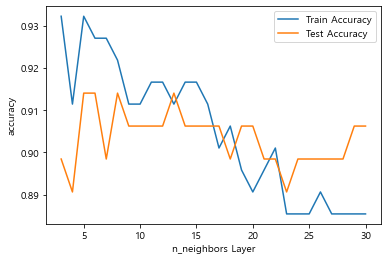

In [9]:
# 모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors Layer")
plt.legend()

> 군집이 1개일 때 Train 데이터의 정확도는 1  
> 군집이 증가할수록 Train 데이터의 성능이 감소하는 경향이 있다.
> 데이터 성능을 고려하여 이웃 수가 5가 좋을 것으로 판단됨.

- 가중치별 이웃 수 증가에 따른 정확도 변화

In [10]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# 이웃 수
para_n_neighbors=[i for i in range(3, 31)]*2
# 가중치(uniform, distance)
para_weights=(["uniform"])*28 + (["distance"]*28)

# zip(list1, list2, ...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors=para_n_neighbors[0], weights=para_weights[0]
# 2번 loop: n_neighbors=para_n_neighbors[1], weights=para_weights[1]
for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors, weights=v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_weights=pd.DataFrame()
df_accuracy_weights["Neighbors"]=para_n_neighbors
df_accuracy_weights["Weights"]=para_weights
df_accuracy_weights["TrainAccuracy"]=train_accuracy
df_accuracy_weights["TestAccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,3,uniform,0.932,0.898
1,4,uniform,0.911,0.891
2,5,uniform,0.932,0.914
3,6,uniform,0.927,0.914
4,7,uniform,0.927,0.898
5,8,uniform,0.922,0.914
6,9,uniform,0.911,0.906
7,10,uniform,0.911,0.906
8,11,uniform,0.917,0.906
9,12,uniform,0.917,0.906


In [11]:
# 그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivot=df_accuracy_weights.pivot(index="Neighbors", columns="Weights", values=["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot                                                                            

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
3                   1.0  0.932292     0.898438  0.898438
4                   1.0  0.911458     0.898438  0.890625
5                   1.0  0.932292     0.914062  0.914062
6                   1.0  0.927083     0.929688  0.914062
7                   1.0  0.927083     0.890625  0.898438
8                   1.0  0.921875     0.906250  0.914062
9                   1.0  0.911458     0.914062  0.906250
10                  1.0  0.911458     0.929688  0.906250
11                  1.0  0.916667     0.914062  0.906250
12                  1.0  0.916667     0.906250  0.906250
13                  1.0  0.911458     0.906250  0.914062
14                  1.0  0.916667     0.906250  0.906250
15                  1.0  0.916667     0.906250  0.906250
16                  1.0  0.911458     0.906250  0.906250
17                  1.0  0.901042     0.906250  0.906250
18                  1.0  0.906250     0.898438  0.898438
19                  1.0  0.895833     0.898438  0.906250
20                  1.0  0.890625     0.906250  0.906250
21                  1.0  0.895833     0.898438  0.898438
22                  1.0  0.901042     0.906250  0.898438
23                  1.0  0.885417     0.906250  0.890625
24                  1.0  0.885417     0.906250  0.898438
25                  1.0  0.885417     0.898438  0.898438
26                  1.0  0.890625     0.906250  0.898438
27                  1.0  0.885417     0.906250  0.898438
28                  1.0  0.885417     0.906250  0.898438
29                  1.0  0.885417     0.906250  0.906250
30                  1.0  0.885417     0.914062  0.906250

In [12]:
# pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0=df_accuracy_weights_pivot.columns.get_level_values(0)
level1=df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns=level0+"_"+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
3,1.0,0.932292,0.898438,0.898438
4,1.0,0.911458,0.898438,0.890625
5,1.0,0.932292,0.914062,0.914062
6,1.0,0.927083,0.929688,0.914062
7,1.0,0.927083,0.890625,0.898438


- 가중치별 이웃 수 증가에 따른 정확도 변화

<AxesSubplot:xlabel='Neighbors'>

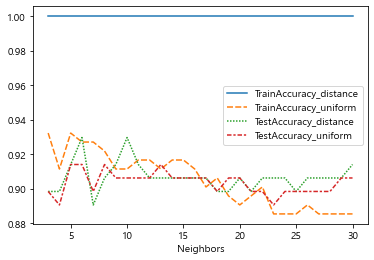

In [13]:
# 그래프 생성. 변수별 linestyle 구분
sns.lineplot(data=df_accuracy_weights_pivot)

> 가중치 distance알 때 train 데이터의 모델 정확도는 1(과대적합), uniform 선택

- 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [14]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# 이웃 수
para_n_neighbors=[i for i in range(3, 31)]*3
# 거리 계산 방법(minkowski, euclidean, manhattan)
para_metric=["minkowski"]*28 + ["euclidean"]*28+["manhattan"]*28

# zip(list1, list2, ...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors=para_n_neighbors[0], metric=para_metric[0]
# 2번 loop: n_neighbors=para_n_neighbors[1], metric=para_metric[1]
for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors, metric=v_metric, weights="uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_metric=pd.DataFrame()
df_accuracy_metric["Neighbors"]=para_n_neighbors
df_accuracy_metric["Metric"]=para_metric
df_accuracy_metric["TrainAccuracy"]=train_accuracy
df_accuracy_metric["TestAccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_metric.round(3).head(8)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,3,minkowski,0.932,0.898
1,4,minkowski,0.911,0.891
2,5,minkowski,0.932,0.914
3,6,minkowski,0.927,0.914
4,7,minkowski,0.927,0.898
5,8,minkowski,0.922,0.914
6,9,minkowski,0.911,0.906
7,10,minkowski,0.911,0.906


<AxesSubplot:xlabel='Neighbors'>

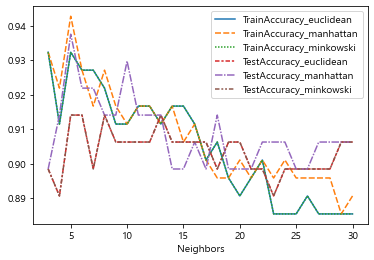

In [15]:
# 정확도를 그래프로 그림
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index="Neighbors", columns="Metric", values=["TrainAccuracy", "TestAccuracy"])

level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+"_"+level1

sns.lineplot(data=df_accuracy_metric_pivot)

> 전체적으로 manhattan 거리 계산 방법을 사용할 시 정확도가 더 높다.

## 3. 최종 모델 선정 및 평가

In [16]:
# 최종 모델
knn_final=KNeighborsClassifier(n_neighbors=5, weights="uniform", metric="manhattan")
knn_final.fit(df_train_x, df_train_y)

# 예측
y_pred=knn_final.predict(df_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(knn_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(knn_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.943

Accuracy on test set: 0.938

Confusion matrix: 
[[90  7]
 [ 1 30]]


> - 예측 정확도 : 0.938 (training set의 정확도는 0.943으로 과소 적합됨)
> - 이웃 수 : 5
> - 가중치 : 균일(uniform)
> - 거리계산 : manhattan